<a href="https://colab.research.google.com/github/varunreddy1268/spark_foundation/blob/main/iris_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt

In [86]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [87]:
print(iris.keys())
iris

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [88]:
df['Target']=iris.target
dic1=dict(zip(np.array([0,1,2,3]),iris.target_names))
dic1

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [89]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [90]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
Target,0.782561,-0.426658,0.949035,0.956547,1.000000


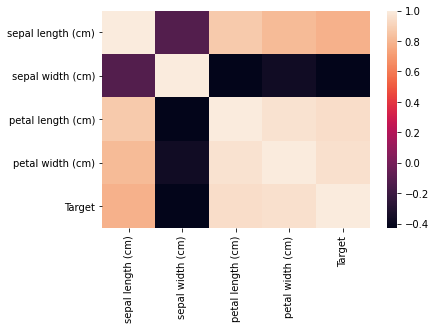

In [91]:
sns.heatmap(df.corr())
#From the correlation we can have a idea that with 
#*Target--> has positive correaltion with sepal_length and petal_length,petal width and negetive correlation with sepal width.

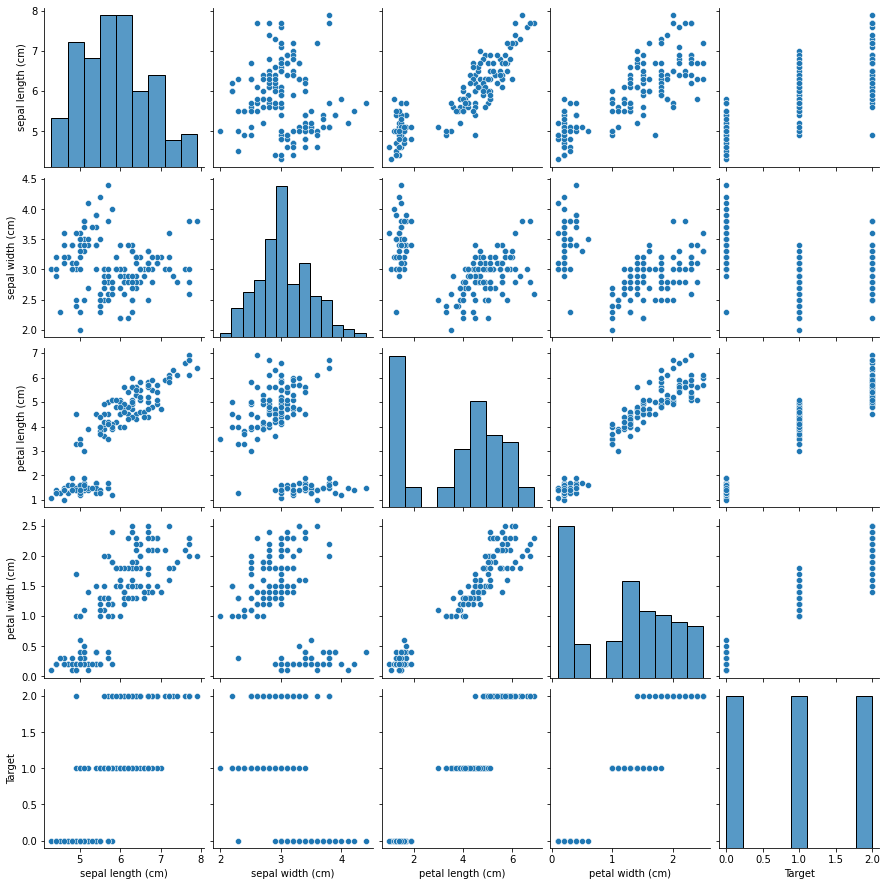

In [92]:
#you can see the realtion b/w target and remaining features below ..
sns.pairplot(df)

In [93]:
df.isnull().any()

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
Target               False
dtype: bool

In [94]:
df['Target'].value_counts()

2    50
1    50
0    50
Name: Target, dtype: int64

In [95]:
x=df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
x.head()
y=df[['Target']]
y

,Target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [96]:
#lets scale the features and prepare the k-means clustering model
from sklearn.cluster import KMeans
elbow=[]
for i in range(1,11):
  model1=KMeans(n_clusters=i,max_iter=100)
  model1.fit(x)
  elbow.append(model1.inertia_)
elbow

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.228473214285714,
 49.84221386276559,
 39.03998724608725,
 34.40900974025974,
 30.11090607199818,
 28.177294006336915,
 26.2575801309114]

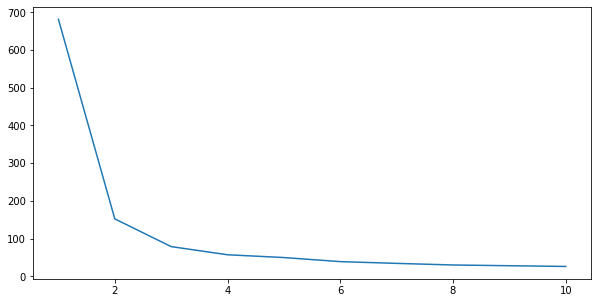

In [97]:
plt.figure(figsize=(10,5))
plt.plot(list(range(1,11)),elbow)

In [98]:
#By the elbow method we can see that a t point 3 the data remain almost constant. So we will take n_clusters=3and predict the data values and plot the plot and compare the plot with the original one.
model=KMeans(n_clusters=3,max_iter=100)
model.fit(x) 
pred=model.fit_predict(x)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [99]:
#lets merge the preicted to the df and will cluster by consediring any two columns as x,y axis
x['pred']=pred
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),pred
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


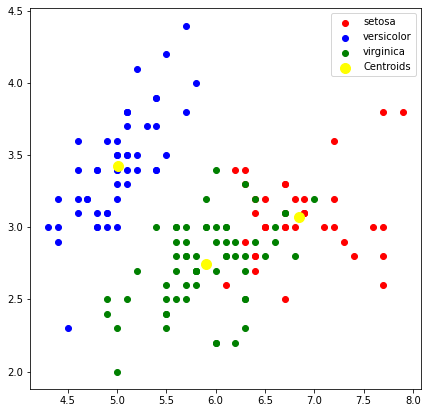

In [108]:
#Now letus plot the clusters and comapre it with original clusters
plt.figure(figsize=(7,7))
plt.scatter(x[x['pred']==0]['sepal length (cm)'],x[x['pred']==0]['sepal width (cm)'],color='r',label=(dic1[0]))
plt.scatter(x[x['pred']==1]['sepal length (cm)'],x[x['pred']==1]['sepal width (cm)'],color='b',label=(dic1[1]))
plt.scatter(x[x['pred']==2]['sepal length (cm)'],x[x['pred']==2]['sepal width (cm)'],color='g',label=(dic1[2]))
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

In [109]:
from sklearn.metrics import classification_report
print(classification_report(y,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.00      0.00      0.00        50
           2       0.23      0.28      0.25        50

    accuracy                           0.09       150
   macro avg       0.08      0.09      0.08       150
weighted avg       0.08      0.09      0.08       150

